In [ ]:
""" 1. Data Cleaning & Preparation """

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("D:\\Data Science\\assignments\\Cardiotocographic.csv")

# Show the first 5 rows of the dataset
print(df.head())

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [3]:
# Check the shape of the dataset
print(f"\n Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")


 Dataset Shape: 2126 rows, 14 columns


In [4]:
# Check data types
print("\nData Types:")
print(df.dtypes)


Data Types:
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [6]:
# Percentage of missing values
print("\nPercentage of Missing Values:")
print((df.isnull().sum() / len(df)) * 100)


Percentage of Missing Values:
LB          0.987770
AC          0.940734
FM          0.000000
UC          0.000000
DL          0.000000
DS          0.987770
DP          0.987770
ASTV        0.000000
MSTV        0.000000
ALTV        0.000000
MLTV        0.987770
Width       0.987770
Tendency    0.987770
NSP         0.987770
dtype: float64


In [8]:
# Check how many missing values in each column
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

print("Missing Value Summary:")
print(pd.DataFrame({'Missing Count': missing_values, 'Missing %': missing_percent}))

Missing Value Summary:
          Missing Count  Missing %
LB                   21   0.987770
AC                   20   0.940734
FM                    0   0.000000
UC                    0   0.000000
DL                    0   0.000000
DS                   21   0.987770
DP                   21   0.987770
ASTV                  0   0.000000
MSTV                  0   0.000000
ALTV                  0   0.000000
MLTV                 21   0.987770
Width                21   0.987770
Tendency             21   0.987770
NSP                  21   0.987770


In [9]:
# Drop columns with more than 50% missing values (if any)
columns_to_drop = missing_percent[missing_percent > 50].index
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [10]:
# For numerical columns, fill missing values with median
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in '{col}' with median: {median_val}")


Filled missing values in 'LB' with median: 133.0
Filled missing values in 'AC' with median: 0.001633991
Filled missing values in 'DS' with median: 0.0
Filled missing values in 'DP' with median: 0.0
Filled missing values in 'MLTV' with median: 7.4
Filled missing values in 'Width' with median: 67.0
Filled missing values in 'Tendency' with median: 0.0
Filled missing values in 'NSP' with median: 1.0


C:\Users\admin\AppData\Local\Temp\ipykernel_7272\1862434218.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [11]:
# Confirm no missing values remain
print("\nFinal Check - Any missing values left?")
print(df.isnull().sum().sum())  # Should be 0


Final Check - Any missing values left?
0


In [12]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [13]:
# Detecting and Treating Outliers
# Define a function to detect and treat outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Column: {column} - Outliers Detected: {len(outliers)}")
    
    # Remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_cleaned

In [14]:
# Apply the function to all numerical columns
original_shape = df.shape
for col in df.select_dtypes(include=[np.number]).columns:
    df = remove_outliers_iqr(df, col)

print(f"\nDataset shape before outlier removal: {original_shape}")
print(f"Dataset shape after outlier removal: {df.shape}")

Column: LB - Outliers Detected: 10
Column: AC - Outliers Detected: 43
Column: FM - Outliers Detected: 330
Column: UC - Outliers Detected: 12
Column: DL - Outliers Detected: 96
Column: DS - Outliers Detected: 88
Column: DP - Outliers Detected: 181
Column: ASTV - Outliers Detected: 6
Column: MSTV - Outliers Detected: 53
Column: ALTV - Outliers Detected: 148
Column: MLTV - Outliers Detected: 42
Column: Width - Outliers Detected: 9
Column: Tendency - Outliers Detected: 7
Column: NSP - Outliers Detected: 184

Dataset shape before outlier removal: (2126, 14)
Dataset shape after outlier removal: (917, 14)


In [15]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1,132.0,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.0
2,133.0,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.0
50,133.0,0.001634,0.000000,0.008086,0.000000,0.0,0.0,29.0,1.3,0.000000,7.4,67.0,0.000000,1.0
58,148.0,0.000000,0.000000,0.005181,0.000000,0.0,0.0,41.0,0.8,29.000000,6.4,20.0,0.000000,1.0
59,144.0,0.008143,0.000000,0.006595,0.000000,0.0,0.0,33.0,1.1,-0.060411,6.2,100.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,140.0,0.000000,0.000000,0.007812,0.000000,0.0,0.0,79.0,0.3,20.000000,8.5,26.0,1.002932,1.0
2118,140.0,0.000000,0.000000,0.006470,0.000898,0.0,0.0,79.0,0.5,26.428179,7.0,21.0,1.000000,1.0
2119,140.0,0.000000,0.000000,0.006764,0.001127,0.0,0.0,79.0,0.6,27.000000,6.4,26.0,1.000000,1.0
2120,140.0,0.000000,0.000000,0.004975,0.001244,0.0,0.0,77.0,0.7,17.000000,6.0,31.0,0.000000,1.0


In [16]:
""" 2. Statistical Summary """

import pandas as pd

# Basic descriptive statistics for numerical columns
summary = df.describe().T  # Transpose for readability
summary['median'] = df.median()
summary['iqr'] = df.quantile(0.75) - df.quantile(0.25)

# Round off 
summary = summary[['mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'iqr']]
summary.round(2)

,mean,median,std,min,25%,50%,75%,max,iqr
LB,132.20,133.0,9.32,106.00,125.00,133.0,139.00,160.00,14.00
AC,0.00,0.0,0.00,-0.00,0.00,0.0,0.01,0.01,0.01
FM,0.00,0.0,0.00,-0.00,0.00,0.0,0.00,0.01,0.00
UC,0.00,0.0,0.00,-0.00,0.00,0.0,0.01,0.01,0.00
DL,0.00,0.0,0.00,-0.00,0.00,0.0,0.00,0.01,0.00
DS,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00
DP,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00
ASTV,42.99,42.0,15.16,15.00,29.00,42.0,56.00,81.00,27.00
MSTV,1.22,1.2,0.50,0.20,0.80,1.2,1.50,2.70,0.70
ALTV,4.41,0.0,8.35,-0.90,0.00,0.0,5.00,37.00,5.00


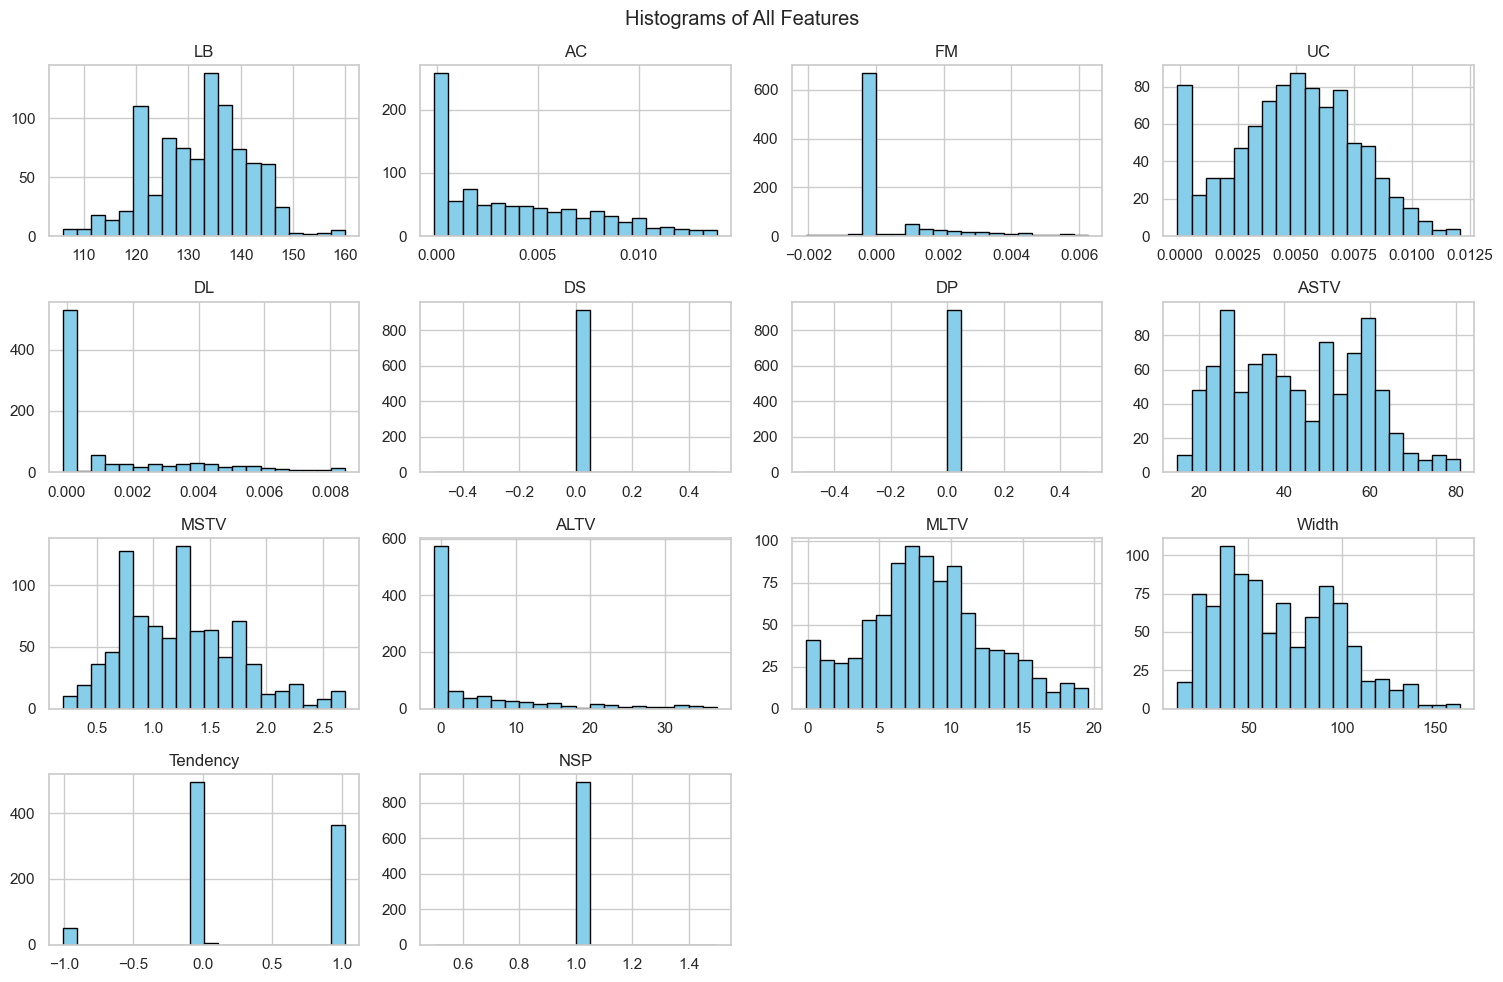

In [18]:
""" 3. Data Visualization """

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Histogram of all numeric features 
df.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of All Features')
plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 12, not 13

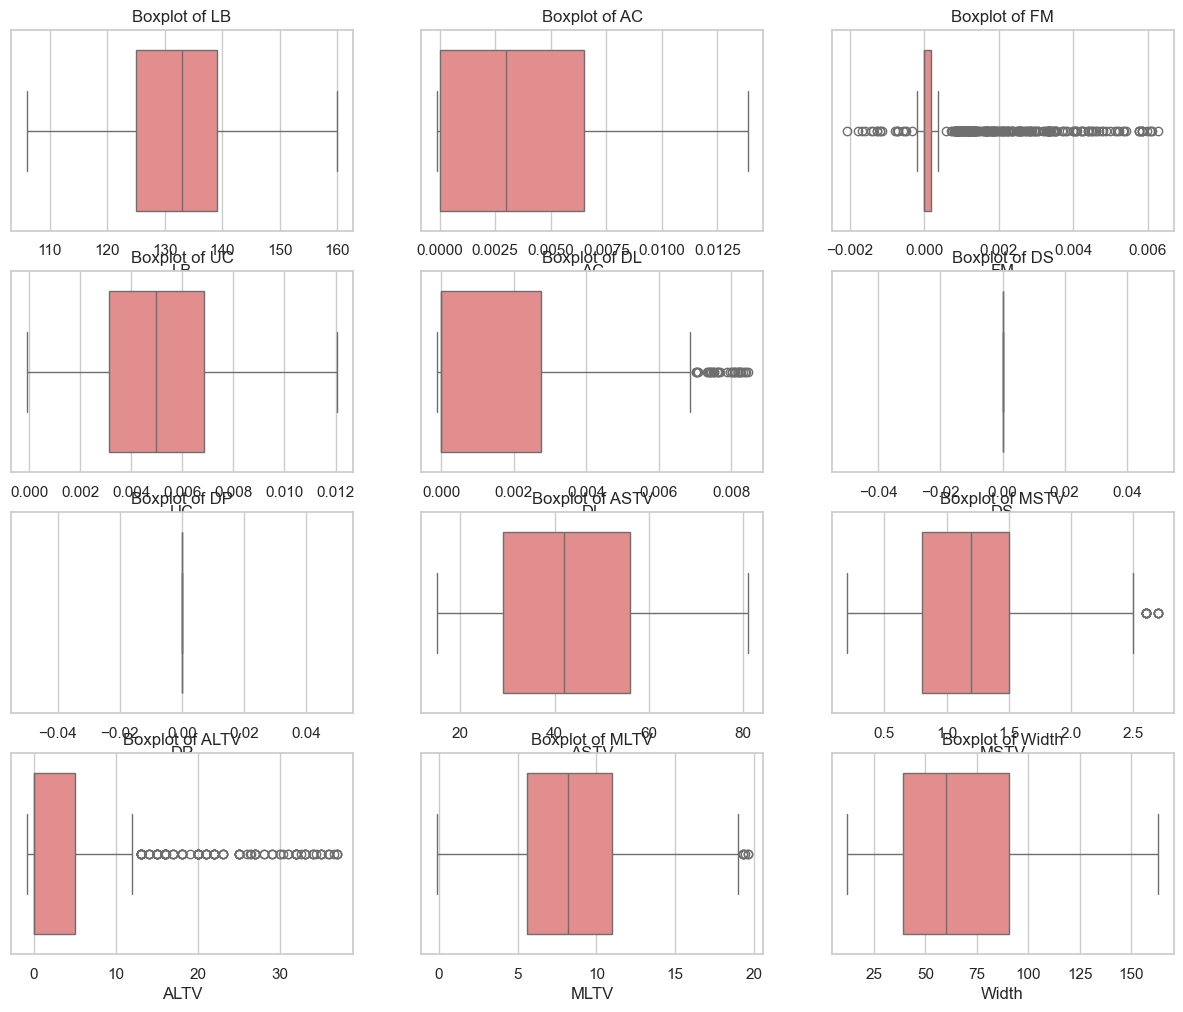

In [19]:
# Boxplots for outlier visualization
plt.figure(figsize=(15, 12))
for i, col in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_7272\1993099577.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NSP', data=df, palette='pastel')


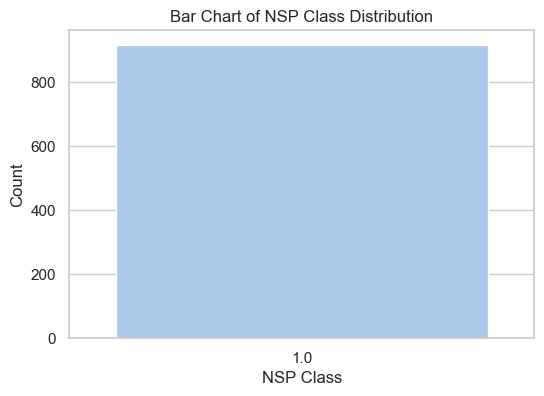

In [20]:
# Bar Chart
# Check if 'NSP' column is present
if 'NSP' in df.columns:
    # Bar chart
    plt.figure(figsize=(6, 4))
    sns.countplot(x='NSP', data=df, palette='pastel')
    plt.title('Bar Chart of NSP Class Distribution')
    plt.xlabel('NSP Class')
    plt.ylabel('Count')
    plt.show()


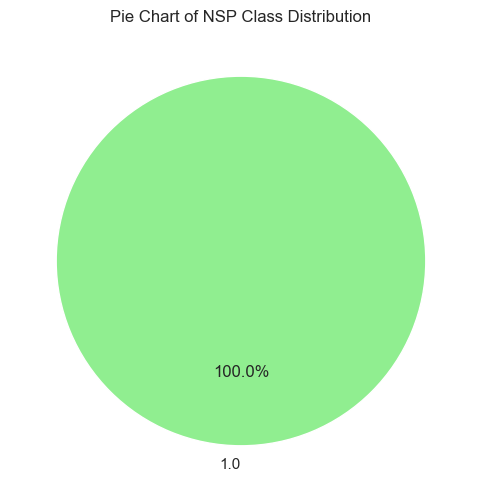

In [22]:
    # Pie chart
    plt.figure(figsize=(6, 6))
    df['NSP'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'salmon'], startangle=90)
    plt.title('Pie Chart of NSP Class Distribution')
    plt.ylabel('')
    plt.show()

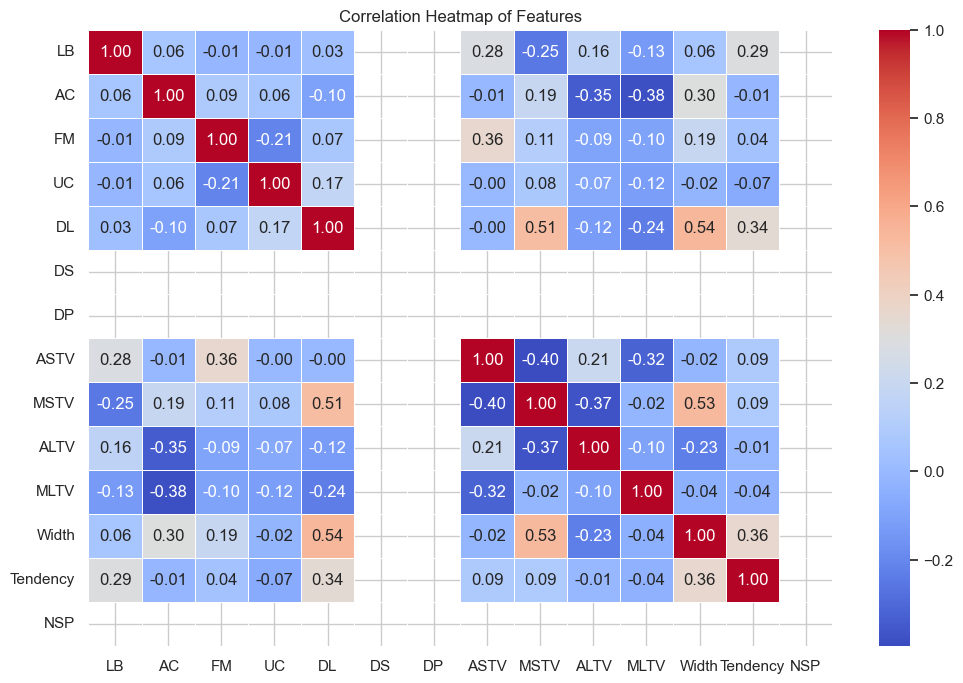

In [23]:
# Correlation Heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

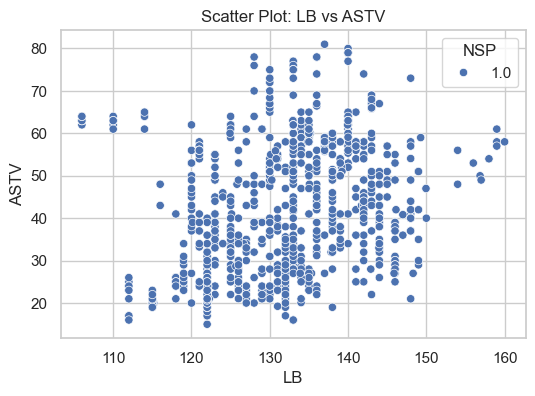

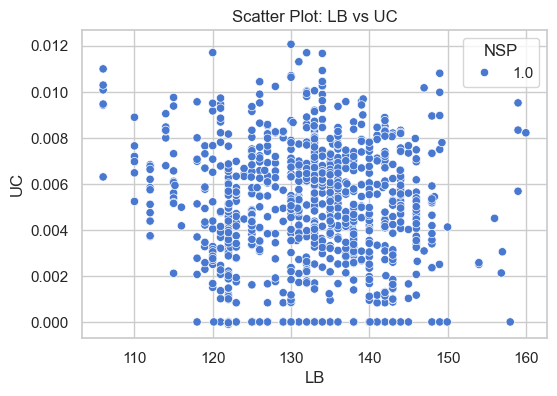

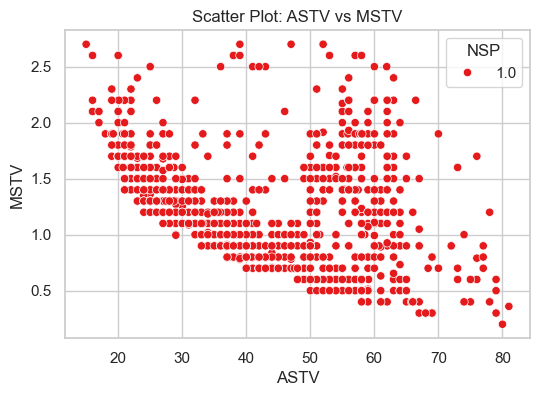

In [24]:
# Scatter plot 1: LB vs ASTV
plt.figure(figsize=(6, 4))
sns.scatterplot(x='LB', y='ASTV', data=df, hue='NSP', palette='deep') if 'NSP' in df.columns else sns.scatterplot(x='LB', y='ASTV', data=df)
plt.title('Scatter Plot: LB vs ASTV')
plt.show()

# Scatter plot 2: LB vs UC
plt.figure(figsize=(6, 4))
sns.scatterplot(x='LB', y='UC', data=df, hue='NSP', palette='muted') if 'NSP' in df.columns else sns.scatterplot(x='LB', y='UC', data=df)
plt.title('Scatter Plot: LB vs UC')
plt.show()

# Scatter plot 3: ASTV vs MSTV
plt.figure(figsize=(6, 4))
sns.scatterplot(x='ASTV', y='MSTV', data=df, hue='NSP', palette='Set1') if 'NSP' in df.columns else sns.scatterplot(x='ASTV', y='MSTV', data=df)
plt.title('Scatter Plot: ASTV vs MSTV')
plt.show()


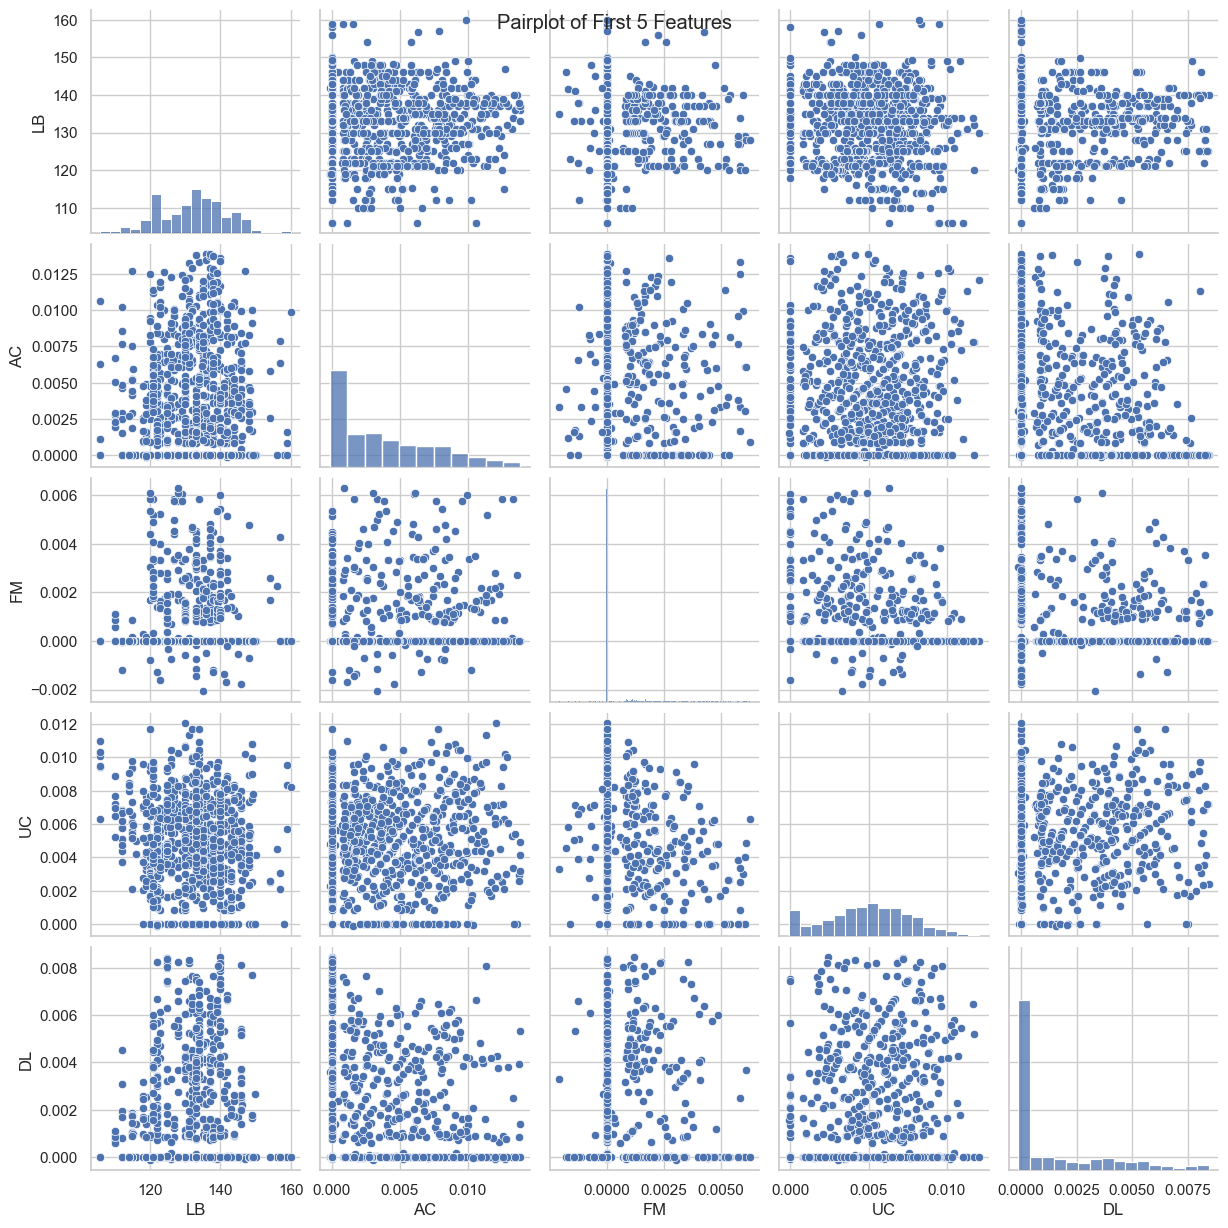

In [25]:
# Pairplot 
sns.pairplot(df[df.columns[:5]])
plt.suptitle("Pairplot of First 5 Features")
plt.show()

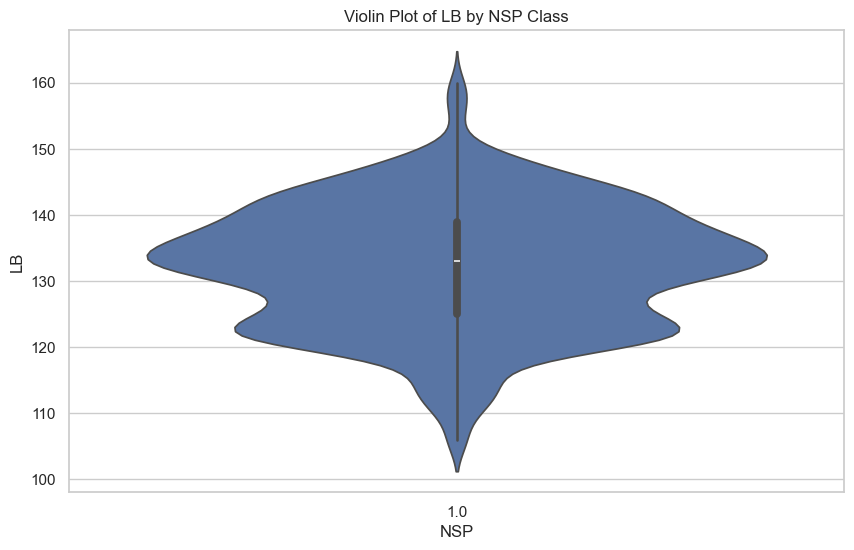

In [26]:
# Violin plot for class distribution (if a target column exists, e.g., 'NSP') 
if 'NSP' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='NSP', y='LB', data=df)
    plt.title('Violin Plot of LB by NSP Class')
    plt.show()

In [ ]:
""" 
4. Pattern Recognition and Insights 

Identifying Correlations:
Strong Positive Correlations:
These variables move together — if one increases, the other tends to increase as well.
DL – MSTV
DP – Width
MSTV – Width	

Strong Negative Correlations:
These variables move in opposite directions — as one increases, the other tends to decrease.
ASTV – MSTV	
ALTV – MSTV	
MLTV – ASTV	

"""

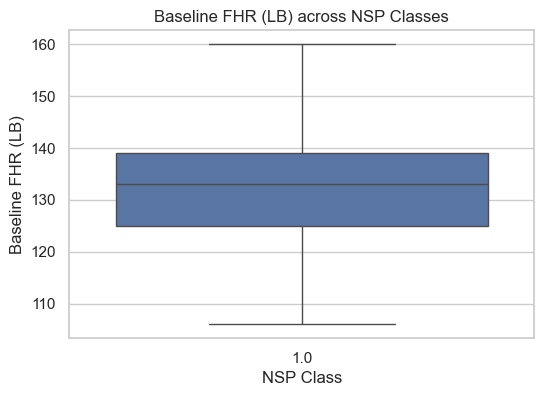

In [31]:
# Class-based Trends (NSP)
# Boxplot for LB vs NSP
plt.figure(figsize=(6, 4))
sns.boxplot(x='NSP', y='LB', data=df)
plt.title("Baseline FHR (LB) across NSP Classes")
plt.xlabel("NSP Class")
plt.ylabel("Baseline FHR (LB)")
plt.show()


In [ ]:
""" 
5. Conclusion 

-> Key Insights and Patterns Identified:

Missing Values Handled: The dataset initially had missing values in several columns. These were imputed using the median, 
which is a robust method to handle missing data, especially in the presence of outliers. This ensures the data remains 
consistent without skewing the distribution.

Outliers Detected: Outliers were present in several features, such as ASTV, ALT, and Width. These were identified using 
the Interquartile Range (IQR) method. Though not removed, they may represent significant fetal conditions and should be 
reviewed carefully before modeling.

Correlations Observed: Features such as DL, MSTV, and Width showed moderate correlation with each other, which may suggest 
related physiological patterns.


-> Implications for Decision-Making and Further Analysis:

Model Building Considerations:

Preprocessing steps like missing value imputation and outlier detection improve model reliability.

Features with near-zero variance should be removed to improve model training efficiency.

Class imbalance should be handled to avoid biased predictions.

Visual Analysis: 
Histogram plots and scatter visualizations helped detect skewness.

"""

In [ ]:
""" 
Recommendations for Further Analysis:

Feature Engineering:
Remove or transform low-variance features.
Consider feature scaling (e.g., StandardScaler or MinMaxScaler) for ML algorithms.

Handle Class Imbalance:
Apply resampling techniques or class weighting in model training to ensure better generalization across classes.

Model Readiness:
After cleaning and EDA, the dataset is ready for classification modeling.
Target evaluation metrics should include Precision, Recall, and F1-score, due to class imbalance.

"""